# Water Potability Classification Model

Imports


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_curve, auc

# water_potability.csv

In [ ]:
waterData = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/water_potability.csv')

In [ ]:
waterData.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
waterData.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
waterData = waterData.sort_values(by='Potability').reset_index(drop=True)

In [ ]:
waterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# EDA

<Axes: xlabel='Potability', ylabel='count'>

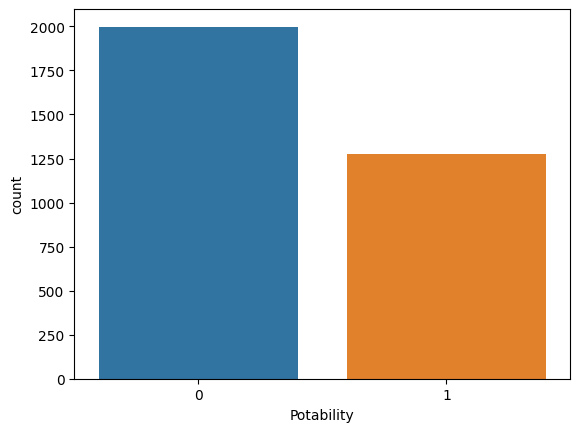

In [ ]:
sns.countplot(data = waterData, x ='Potability')

Relation between water hardness and solid concentration

In [ ]:
# Take the variables I need
hardness = waterData['Hardness']
solids = waterData['Solids']

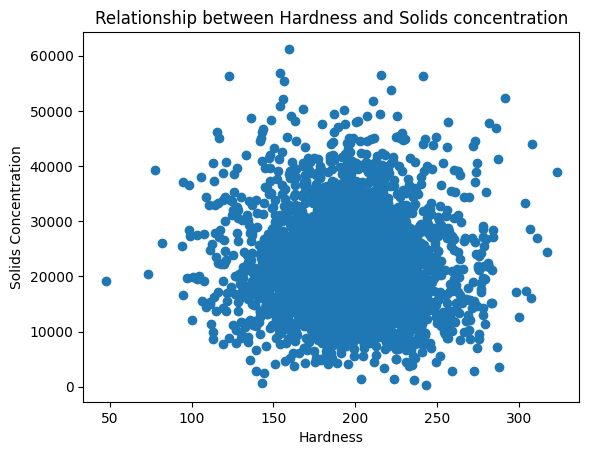

In [ ]:
# Create a graph with the 2 variables I chose
plt.scatter(hardness, solids)

# Graph properties
plt.title('Relationship between Hardness and Solids concentration')
plt.xlabel('Hardness')
plt.ylabel('Solids Concentration')
plt.show()

In [ ]:
correlation_coefficient = hardness.corr(solids)

In [ ]:
print(correlation_coefficient)

-0.046899365488177656


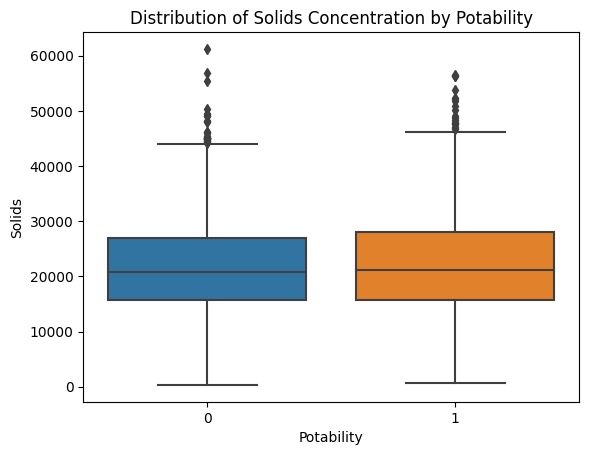

In [ ]:
sns.boxplot(x='Potability', y='Solids', data = waterData)
plt.title('Distribution of Solids Concentration by Potability')
plt.show()

In [ ]:
potability_correlation = waterData.corr()['Potability'].sort_values(ascending=False)
print(potability_correlation)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64


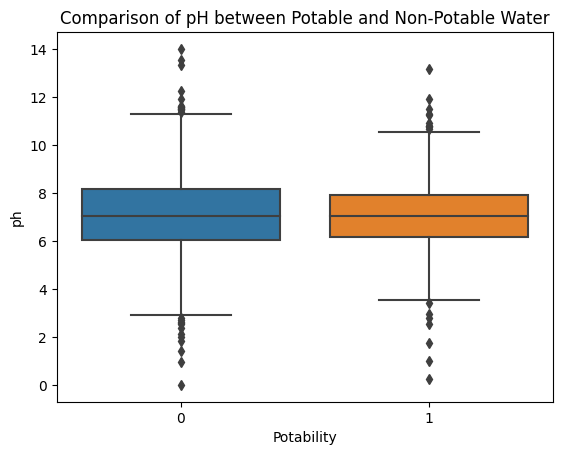

In [ ]:
sns.boxplot(x='Potability', y='ph', data=waterData)
plt.title('Comparison of pH between Potable and Non-Potable Water')
plt.show()

In [ ]:
non_potable_ph = waterData[waterData['Potability'] == 0]['ph'].describe()

potable_ph = waterData[waterData['Potability'] == 1]['ph'].describe()

print("Non-Potable Water pH:")
print(non_potable_ph)
print("\nPotable Water pH:")
print(potable_ph)

Non-Potable Water pH:
count    1684.000000
mean        7.085378
std         1.683499
min         0.000000
25%         6.037723
50%         7.035456
75%         8.155510
max        14.000000
Name: ph, dtype: float64

Potable Water pH:
count    1101.000000
mean        7.073783
std         1.448048
min         0.227499
25%         6.179312
50%         7.036752
75%         7.933068
max        13.175402
Name: ph, dtype: float64


# Dataset Preprocessing

Mean Imputation Method (Old)

In [ ]:
imp_mean = SimpleImputer(strategy= 'mean')

In [ ]:
waterImputed = imp_mean.fit_transform(waterData)

K-Nearest Neighbours Imputation Method (New)

In [ ]:
knn_imputer = KNNImputer(n_neighbors=10)

In [ ]:
waterImputed = knn_imputer.fit_transform(waterData)

In [ ]:
waterPotability = pd.DataFrame(waterImputed, columns=waterData.columns)

In [ ]:
waterPotability.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.079837,196.369496,22014.092526,7.122277,333.624427,426.205111,14.284970,66.430278,3.966786,0.390110
std,1.484111,32.879761,8768.570828,1.583085,36.878289,80.824064,3.308162,15.804503,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.254505,176.850538,15666.690297,6.127421,313.808921,365.734414,12.065801,56.524092,3.439711,0.000000
50%,7.034555,196.967627,20927.833607,7.130299,333.254489,421.884968,14.218338,66.671617,3.955028,0.000000
75%,7.913438,216.667456,27332.762127,8.114887,352.960380,481.792304,16.557652,76.749604,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Splitting data into training and testing sets

Splitting 80/20

In [ ]:
X = waterPotability.drop('Potability', axis=1)
y = waterPotability['Potability']
X_WaterTrain, X_WaterTest, y_WaterTrain, y_WaterTest = train_test_split(X, y, test_size = 0.2, random_state=39)

In [ ]:
X_WaterTrain.shape, X_WaterTest.shape, y_WaterTrain.shape, y_WaterTest.shape

((2620, 9), (656, 9), (2620,), (656,))

## Scaling

SMOTE (Decreased accuracy so not in use)

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_WaterTrain, y_WaterTrain = smote.fit_resample(X_WaterTrain, y_WaterTrain)

Implementing Standard Scaling

In [ ]:
sc = StandardScaler()

In [ ]:
X_WaterTrain = sc.fit_transform(X_WaterTrain)

In [ ]:
X_WaterTest = sc.transform(X_WaterTest)

In [ ]:
print(X_WaterTrain), print(X_WaterTest)

[[-0.76793799 -0.75922504 -0.82864661 ... -1.14059291 -0.54771621
  -0.98213879]
 [-0.36613809  0.68196739  0.14691022 ... -1.06807571 -1.64112976
   0.30683147]
 [ 0.13089066 -1.23366457 -0.6602675  ... -0.58928333 -0.43136636
  -1.0560214 ]
 ...
 [ 0.40466013  0.26029073 -0.0565875  ...  0.62958477  0.74209822
  -1.01218415]
 [-0.02912562  0.83189502 -0.21635645 ... -1.00962064 -1.10546072
   0.43916831]
 [-0.55105112 -1.13623062 -0.37926325 ...  0.248943    0.1078251
  -0.91024429]]
[[-0.32680144 -0.14032758  0.34503741 ...  0.1372526   0.87199912
   0.44407242]
 [-0.56415043 -1.01585872  0.50178581 ...  2.84297635 -3.02314495
   1.37865187]
 [-0.71166205  2.03616619 -0.55792247 ...  1.94900745  0.64670703
   0.13837704]
 ...
 [ 0.83528094  0.76319471 -0.6754438  ...  2.41310431  0.57222064
  -1.56124716]
 [ 0.81172483  0.95884117 -0.46117363 ...  0.03610956 -3.20765972
  -0.36715888]
 [ 0.76191819 -0.19687774 -0.52382717 ...  0.3324836  -0.73428764
   0.22985893]]


(None, None)

## SVM Model (Less Accurate)


In [ ]:
svm_model = SVC()
svm_model.fit(X_WaterTrain, y_WaterTrain)

SVC()

In [ ]:
y_pred = svm_model.predict(X_WaterTest)

In [ ]:
svm_acc = accuracy_score(y_WaterTest, y_pred)

In [ ]:
cm = confusion_matrix(y_WaterTest, y_pred)
cm

array([[382,  36],
       [150,  88]])

In [ ]:
print(svm_acc)

0.6951219512195121


In [ ]:
print(classification_report(y_WaterTest, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.95      0.79       396
         1.0       0.81      0.30      0.44       260

    accuracy                           0.70       656
   macro avg       0.74      0.63      0.61       656
weighted avg       0.73      0.70      0.65       656



## Random Forest Model (More Accurate)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=3)
rf_model.fit(X_WaterTrain, y_WaterTrain)

RandomForestClassifier(n_estimators=200, random_state=3)

In [ ]:
y_pred = rf_model.predict(X_WaterTest)

In [ ]:
rf_acc = accuracy_score(y_WaterTest, y_pred)

In [ ]:
cm = confusion_matrix(y_WaterTest, y_pred)
cm

array([[372,  46],
       [132, 106]])

In [ ]:
print(rf_acc)

0.7301829268292683


In [ ]:
print(classification_report(y_WaterTest, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81       418
         1.0       0.70      0.44      0.54       238

    accuracy                           0.73       656
   macro avg       0.72      0.67      0.68       656
weighted avg       0.73      0.73      0.71       656



# Cross_validation

In [ ]:
cv = KFold(n_splits=10, random_state=3, shuffle=True)

In [ ]:
cross_val_score(RandomForestClassifier(), X_WaterTest, y_WaterTest, cv=cv)

array([0.5       , 0.66666667, 0.59090909, 0.57575758, 0.74242424,
       0.66666667, 0.63076923, 0.64615385, 0.73846154, 0.61538462])

In [ ]:
print('Mean Accuracy : ', np.mean(cross_val_score(RandomForestClassifier(), X_WaterTrain, y_WaterTrain, cv=cv)))

Mean Accuracy :  0.6557251908396946


## ROC Curve

In [ ]:
y_val_pred_prob = rf_model.predict_proba(X_WaterTest)[:, 1]

In [ ]:
falsePositives, truePositives, thresholds = roc_curve(y_WaterTest, y_val_pred_prob)

roc_area = auc(falsePositives, truePositives)

print('Area Under ROC Curve:', roc_area)

Area Under ROC Curve: 0.7309265811587793


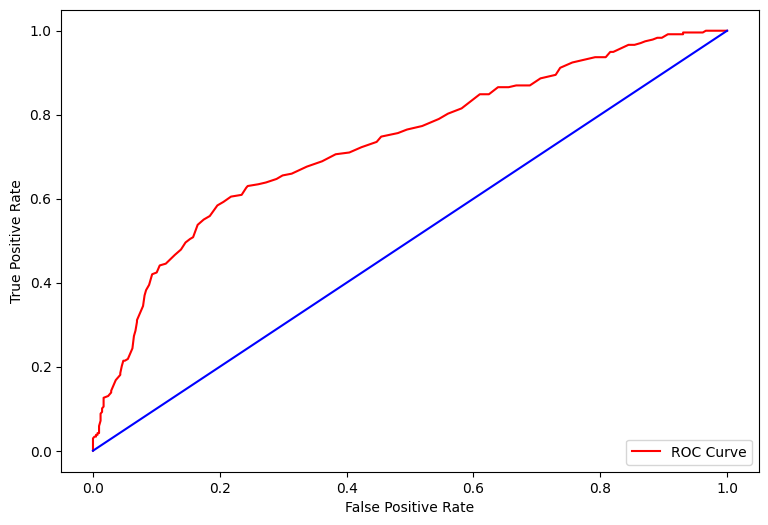

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(falsePositives, truePositives, color='red', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()